In [61]:
import os, sys, glob
import numpy as np
import h5py
import matplotlib.pyplot as plt
from copy import copy as copy

from parameters import get_parameters

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [80]:
mol = "CF2IBr"
run = "sim_validation"
L_max = 10
sims = ["numerical-50", "numerical-100"]

params = get_parameters(run)
params.imgBins = 2*params.NradAzmBins - 1
sim_types = ["numeric", "analytic"]

q_x_lf,q_z_lf = np.meshgrid(
    -1*(np.arange(params.imgBins)-params.NradAzmBins+1)*params.QperPix,
    -1*(np.arange(params.imgBins)-params.NradAzmBins+1)*params.QperPix)
q_x_lf = q_x_lf.astype(np.float32)
q_z_lf = q_z_lf.astype(np.float32)
q_map = np.sqrt(q_x_lf**2 + q_z_lf**2)

In [81]:
mol_mod_raw_anl, mol_mod_raw_num = {}, {}
for sm in sims:
    mol_mod_raw_anl[sm] = {}
    mol_mod_raw_num[sm] = {}
    for stype in sim_types:
        for l in range(0, L_max+1):
            for k in np.arange(-1*l, l+1):
                suffix = "-"+str(l)+".0."+str(k)

                if stype == "numeric":
                    dir_name = os.path.join(params.simOutputDir, sm)
                else:
                    dir_name = os.path.join(params.simOutputDir, sims[-1])
                
                fName = os.path.join(
                    dir_name,
                    "{0}_sim_diffraction-{1}_Qmax-{2:.4g}_time-0_LMK{3}.h5".format(
                        mol, stype, q_map[params.imgBins//2,-1], suffix))
                print("FILE", fName)

                with h5py.File(fName, "r") as h5:
                    mol_mod_raw_ = h5["mol_diffraction_raw"][:]/h5["atm_diffraction"][:]

                if stype == "analytic":
                    mol_mod_raw_anl[sm][(l,0,k)] = copy(mol_mod_raw_)
                else:
                    mol_mod_raw_num[sm][(l,0,k)] = copy(mol_mod_raw_)


FILE /cds/group/ued/scratch/N2O/simulations/numerical-50/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-0.0.0.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-50/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-1.0.-1.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-50/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-1.0.0.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-50/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-1.0.1.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-50/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-2.0.-2.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-50/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-2.0.-1.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-50/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-2.0.0.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-50/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-2.0.1.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-50/CF2IBr_sim_d

FILE /cds/group/ued/scratch/N2O/simulations/numerical-50/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-9.0.-7.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-50/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-9.0.-6.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-50/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-9.0.-5.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-50/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-9.0.-4.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-50/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-9.0.-3.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-50/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-9.0.-2.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-50/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-9.0.-1.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-50/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-9.0.0.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-50/CF2IBr_s

FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-6.0.5.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-6.0.6.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-7.0.-7.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-7.0.-6.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-7.0.-5.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-7.0.-4.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-7.0.-3.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-7.0.-2.h5
FILE /cds/group/ued/scratch/N2O/simulations/numeri

FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-2.0.0.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-2.0.1.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-2.0.2.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-3.0.-3.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-3.0.-2.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-3.0.-1.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-3.0.0.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-3.0.1.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2

FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-9.0.-1.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-9.0.0.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-9.0.1.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-9.0.2.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-9.0.3.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-9.0.4.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-9.0.5.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-9.0.6.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IB

FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-7.0.5.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-7.0.6.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-7.0.7.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-8.0.-8.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-8.0.-7.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-8.0.-6.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-8.0.-5.h5
FILE /cds/group/ued/scratch/N2O/simulations/numerical-100/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-8.0.-4.h5
FILE /cds/group/ued/scratch/N2O/simulations/numeric

In [82]:
compare = {}
mask = np.ones_like(mol_mod_raw_anl[sims[0]][(0,0,0)])
mask[mask.shape[0]//2, mask.shape[1]//2] = 0
X,Y = np.meshgrid(
    np.arange(mol_mod_raw_anl[sims[0]][(0,0,0)].shape[0]),
    np.arange(mol_mod_raw_anl[sims[0]][(0,0,0)].shape[0]))
for sm in sims:
    compare[sm] = {}
    scale = np.sum(np.abs(mask*mol_mod_raw_anl[sm][(2,0,0)]))\
        /np.sum(np.abs(mask*mol_mod_raw_num[sm][(2,0,0)]))
    for lmk in mol_mod_raw_num[sm].keys():
        """
        fig, ax = plt.subplots()
        p = ax.pcolormesh(X, Y, np.real(mol_mod_raw_anl[sm][lmk]))
        fig.colorbar(p, ax=ax)
        fig.savefig("plots/compare/LMK-{}-{}-{}_analytic.png".format(*lmk))
        plt.close()
        fig, ax = plt.subplots()
        p = ax.pcolormesh(X, Y, np.real(mol_mod_raw_num[sm][lmk]))
        fig.colorbar(p, ax=ax)
        fig.savefig("plots/compare/LMK-{}-{}-{}_numerical.png".format(*lmk))
        plt.close()
        """
  
        diff = mol_mod_raw_anl[sm][lmk] - scale*np.conj(mol_mod_raw_num[sm][lmk])
        rl_diff = np.sqrt(np.sum(np.real(diff)**2))
        im_diff = np.sqrt(np.sum(np.imag(diff)**2))
        compare[sm][lmk] = (copy(rl_diff), copy(im_diff),
            np.sqrt(np.sum(np.real(mol_mod_raw_anl[sm][lmk])**2)),
            np.sqrt(np.sum(np.imag(mol_mod_raw_anl[sm][lmk])**2)))

        print("{0} {1}: {2:.3g} / {3:.3g} / {4:.3g} || {5:.3g} / {6:.3g} / {7:.3g}".format(sm, lmk,
            compare[sm][lmk][2], compare[sm][lmk][0], compare[sm][lmk][0]/compare[sm][lmk][2],
            compare[sm][lmk][3], compare[sm][lmk][1], compare[sm][lmk][1]/compare[sm][lmk][3]))

numerical-50 (0, 0, 0): 650 / 378 / 0.581 || 0 / 0 / nan
numerical-50 (1, 0, -1): 1.94e-14 / 3.72 / 1.92e+14 || 2.19e-14 / 3.65 / 1.67e+14
numerical-50 (1, 0, 0): 0 / 11.6 / inf || 5.08e-14 / 5.08e-14 / 1
numerical-50 (1, 0, 1): 1.94e-14 / 3.72 / 1.92e+14 || 2.19e-14 / 3.65 / 1.67e+14
numerical-50 (2, 0, -2): 1.73e-14 / 51.6 / 2.99e+15 || 289 / 113 / 0.392
numerical-50 (2, 0, -1): 157 / 89.7 / 0.57 || 157 / 89.3 / 0.568
numerical-50 (2, 0, 0): 203 / 23.3 / 0.115 || 0 / 0 / nan
numerical-50 (2, 0, 1): 157 / 89.7 / 0.57 || 157 / 89.3 / 0.568
numerical-50 (2, 0, 2): 1.69e-14 / 51.6 / 3.05e+15 || 289 / 113 / 0.392
numerical-50 (3, 0, -3): 4.23e-14 / 3.39 / 8.02e+13 || 3.56e-14 / 3.62 / 1.02e+14
numerical-50 (3, 0, -2): 7.59e-14 / 1.85 / 2.44e+13 || 1.02e-14 / 7.71 / 7.56e+14
numerical-50 (3, 0, -1): 2.32e-14 / 4.12 / 1.77e+14 || 1.94e-14 / 4.34 / 2.24e+14
numerical-50 (3, 0, 0): 0 / 10.5 / inf || 5.39e-14 / 5.39e-14 / 1
numerical-50 (3, 0, 1): 3.5e-14 / 4.12 / 1.18e+14 || 2.55e-14 / 4.34 /

/cds/sw/ds/ana/conda2/inst/envs/ps-4.0.12/lib/python3.7/site-packages/ipykernel/__main__.py:34: RuntimeWarning: invalid value encountered in double_scalars
/cds/sw/ds/ana/conda2/inst/envs/ps-4.0.12/lib/python3.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: divide by zero encountered in double_scalars


RANGE 0.0001
0 1 25.17121830819498 0.0
[[-0. -0. -0. ... -0. -0. -0.]
 [-0. -0. -0. ... -0. -0. -0.]
 [-0. -0. -0. ... -0. -0. -0.]
 ...
 [-0. -0. -0. ... -0. -0. -0.]
 [-0. -0. -0. ... -0. -0. -0.]
 [-0. -0. -0. ... -0. -0. -0.]]


/cds/sw/ds/ana/conda2/inst/envs/ps-4.0.12/lib/python3.7/site-packages/ipykernel/__main__.py:72: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/cds/sw/ds/ana/conda2/inst/envs/ps-4.0.12/lib/python3.7/site-packages/ipykernel/__main__.py:84: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/cds/sw/ds/ana/conda2/inst/envs/ps-4.0.12/lib/python3.7/site-packages/ipykernel/__main__.py:91: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as 

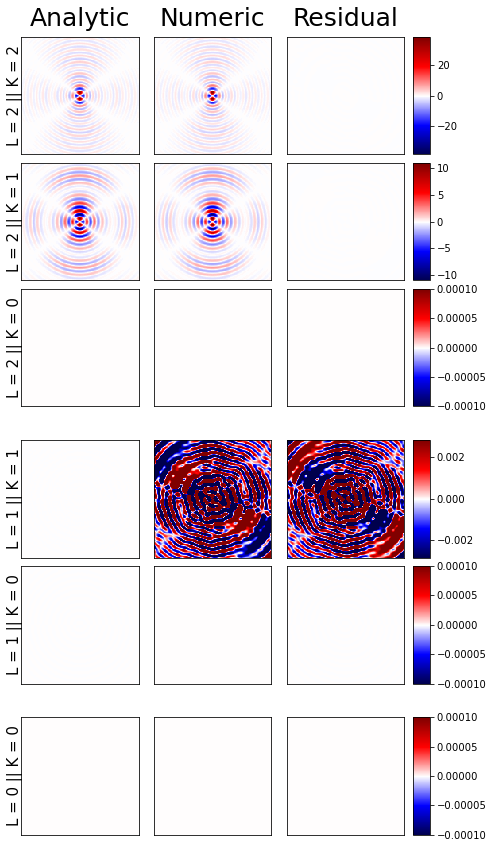

In [107]:
ptype = "imag"
sm = sims[-1]
axs = []
L = 2

top_pad = 0.04
bot_pad = 0.01
l_pad = 0.04
vert_pad = 0.01
vert_dim = (1 - (bot_pad + top_pad + 2*l_pad + 3*vert_pad))/6

horz_pad = 0.03
left_pad = 0.07
right_pad = 0.17
horz_dim = (1 - (left_pad + right_pad + 2*horz_pad))/3

fig_ratio = vert_dim/horz_dim
fig = plt.figure(figsize=(7,7/fig_ratio))


vert_anch = []
count = 0
m_count = 0
for l in range(L+1):
    for m in range(0, l+1):
        m_count += int(m != 0)
        if l == 0:
            vert_anch.append(bot_pad)
        else:
            vert_anch.append(bot_pad + l_pad*l + m_count*vert_pad + vert_dim*count)
        count += 1
            
horz_anch = []
for cc in range(3):
    horz_anch.append(left_pad + (horz_dim + horz_pad)*cc)

caxs = []
rr = 0
for l in range(L+1):
    for m in range(0, l+1):
        axs.append([])
        for cc in range(3):
            axs[rr].append(fig.add_axes((horz_anch[cc], vert_anch[rr], horz_dim, vert_dim)))
        caxs.append(fig.add_axes((horz_anch[cc]+horz_dim+0.1*right_pad, vert_anch[rr], right_pad*0.2, vert_dim)))
        rr += 1


scale = np.sum(np.abs(mask*mol_mod_raw_anl[sm][(2,0,0)]))\
    /np.sum(np.abs(mask*mol_mod_raw_num[sm][(2,0,0)]))
rr = 0
for l in range(L+1):
    for k in range(0, l+1):
        lmk = (l,0,k)
        rng = None
        for cc in range(3):
            if cc == 0:
                if ptype == "real":
                    rng = np.max([np.abs(np.amin(np.real(mol_mod_raw_anl[sm][lmk]))), np.amax(np.real(mol_mod_raw_anl[sm][lmk])),
                             np.abs(np.amin(np.real(mol_mod_raw_num[sm][lmk]))), np.amax(np.real(mol_mod_raw_num[sm][lmk]))])
                    if rng < 1e-14:
                        rng = 1e-4
                    axs[rr][cc].pcolormesh(X, Y, np.real(mol_mod_raw_anl[sm][lmk]),
                            cmap='seismic', vmax=rng, vmin=-1*rng)
                elif ptype == "imag":
                    rng = np.max([np.abs(np.amin(np.imag(mol_mod_raw_anl[sm][lmk]))), np.amax(np.imag(mol_mod_raw_anl[sm][lmk])),
                             np.abs(np.amin(np.imag(mol_mod_raw_num[sm][lmk]))), np.amax(np.imag(mol_mod_raw_num[sm][lmk]))])
                    if rng < 1e-14:
                        rng = 1e-4
                    if l==0:
                        print("RANGE", rng)
                    axs[rr][cc].pcolormesh(X, Y, np.imag(mol_mod_raw_anl[sm][lmk]),
                            cmap='seismic', vmax=rng, vmin=-1*rng)
                plt.text(-0.05, 0.5, "L = "+str(l)+" || K = "+str(k), horizontalalignment='center', fontsize=15,
                        verticalalignment='center', transform=axs[rr][cc].transAxes, rotation=90)
            elif cc == 1:
                if ptype == "real":
                    axs[rr][cc].pcolormesh(X, Y, scale*np.real(mol_mod_raw_num[sm][lmk]),
                            cmap='seismic', vmax=rng, vmin=-1*rng)
                elif ptype == "imag":
                    if l==0:
                        print(rr,cc,scale,np.sum(np.imag(np.conj(mol_mod_raw_num[sm][lmk]))))
                        print(np.imag(np.conj(mol_mod_raw_num[sm][lmk])))
                    axs[rr][cc].pcolormesh(X, Y, scale*np.imag(np.conj(mol_mod_raw_num[sm][lmk])),
                            cmap='seismic', vmax=rng, vmin=-1*rng)
            else:
                if ptype == "real":
                    im = axs[rr][cc].pcolormesh(X, Y, np.real(mol_mod_raw_anl[sm][lmk] - scale*mol_mod_raw_num[sm][lmk]),
                            cmap='seismic', vmax=rng, vmin=-1*rng)
                elif ptype == "imag":
                    im = axs[rr][cc].pcolormesh(X, Y, np.imag(mol_mod_raw_anl[sm][lmk] + scale*mol_mod_raw_num[sm][lmk]),
                            cmap='seismic', vmax=rng, vmin=-1*rng)
                fig.colorbar(im, cax=caxs[rr])
            axs[rr][cc].xaxis.set_visible(False)
            axs[rr][cc].yaxis.set_visible(False)
        
        rr += 1
plt.text(0.5, 1.15, 'Analytic', horizontalalignment='center', fontsize=25,
     verticalalignment='center', transform=axs[-1][0].transAxes)
plt.text(0.5, 1.15, 'Numeric', horizontalalignment='center', fontsize=25,
     verticalalignment='center', transform=axs[-1][1].transAxes)
plt.text(0.5, 1.15, 'Residual', horizontalalignment='center', fontsize=25,
     verticalalignment='center', transform=axs[-1][2].transAxes)

fig.savefig("plots/compare_sims_"+ptype+".png")

In [6]:
labels = []
diff_all, diff_k0 = [], []
for lmk in mol_mod_raw_num.keys():
    if lmk[0] == 0:
        continue
    labels.append(str(lmk))
    diff_all.append(compare[lmk][0])
    if lmk[2] == 0:
        diff_k0.append(compare[lmk][0])

fig, ax = plt.subplots()
ax.plot(np.arange(len(diff_all)), diff_all)
ax.set_xticks(np.arange(len(diff_all)))
ax.set_xticklabels(labels, rotation='vertical')
plt.tight_layout()
fig.savefig("plots/compare/differences_real.png")
plt.close()

fig, ax = plt.subplots()
ax.plot(np.arange(len(diff_k0)), diff_k0)
ax.set_xticks(np.arange(len(diff_k0)))
fig.savefig("plots/compare/differences_k0.png")
plt.close()


KeyError: 0

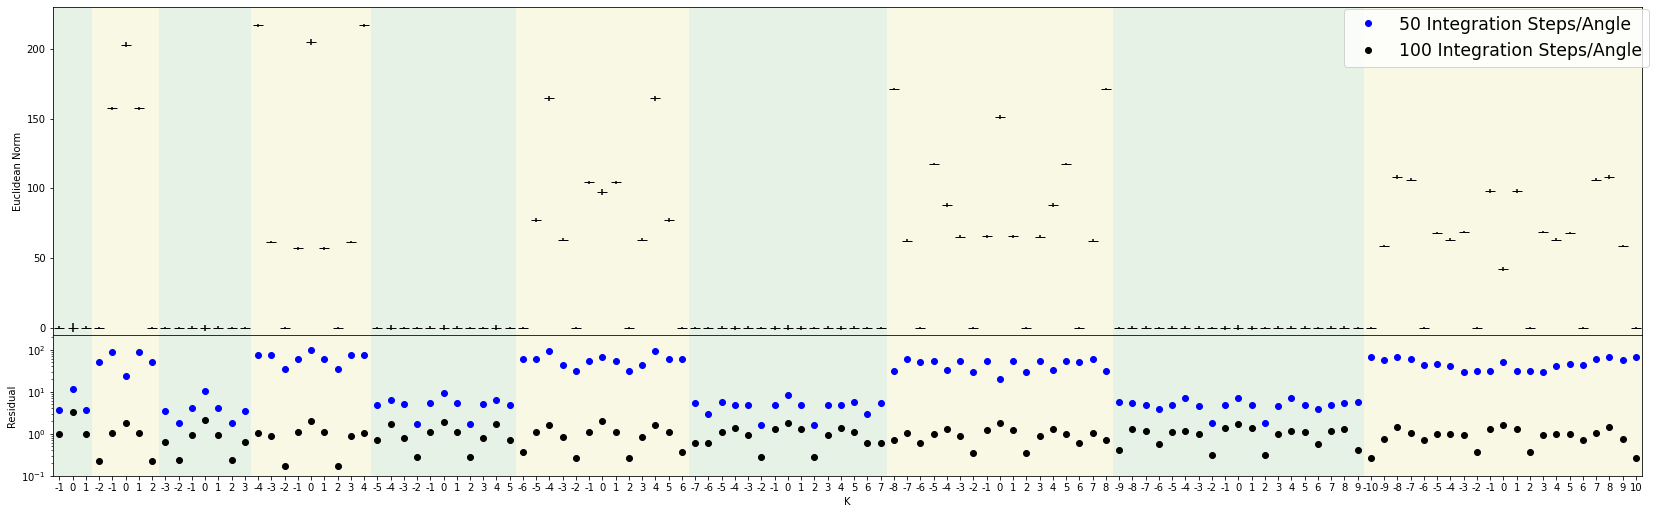

In [93]:
#fig, ax = plt.subplots(2, 1, figsize=(20, 7))
colors = ['b', 'k']
leg_labels = ["50 Integration Steps/Angle", "100 Integration Steps/Angle"]
fig = plt.figure(figsize=(23, 7))
ax = []
ax.append(fig.add_axes((0.03, 0.35, 0.96, 0.65)))
ax.append(fig.add_axes((0.03, 0.07, 0.96, 0.28)))
max_norm = 0

for ism, sm in enumerate(sims):
    labels = []
    norm = []
    err = []
    for lmk in mol_mod_raw_num[sm].keys():
        prev_norm_size = len(norm)
        if lmk[0] == 0:
            continue
        labels.append(str(lmk[-1]))
        norm.append(compare[sm][lmk][2])
        err.append(compare[sm][lmk][0])
    if ism == len(sims) - 1:
        ax[0].errorbar(np.arange(len(norm)), norm, yerr=err,
              fmt='_', markersize=10, color='k', ecolor='k')
    ax[1].plot(np.arange(len(norm)), err, 'o', color=colors[ism], label=leg_labels[ism])
    max_norm = np.amax(norm+[max_norm])
    
        
yL0, yH0 = -5, 230
yL1, yH1 = 1e-1, max_norm*1.05
ax[0].set_xlim(-0.5, len(norm)-0.5)
ax[1].set_xlim(-0.5, len(norm)-0.5)
ax[1].set_xlabel("K")
ax[0].set_ylim(yL0, yH0)
ax[1].set_ylim(yL1, yH1)
ax[0].set_ylabel("Euclidean Norm")
ax[1].set_ylabel("Residual")
ax[1].set_yscale('log')

ax[1].set_xticks(np.arange(len(norm)))
ax[1].set_xticklabels(labels)#, rotation='vertical')

start = 0
for l in np.arange(L_max+1):
    if l == 0:
        continue
    
    if l%2 == 0:
        clr = 'y'
    else:
        clr = 'g'
    rect = plt.Rectangle((start-0.5, yL0), 2*l+1, yH0-yL0, facecolor=clr, alpha=0.1)
    ax[0].add_patch(rect)
    rect = plt.Rectangle((start-0.5, yL1), 2*l+1, yH1-yL1, facecolor=clr, alpha=0.1)
    ax[1].add_patch(rect)
    start += 2*l + 1

fig.legend(loc='upper right', fontsize='xx-large')
fig.savefig("plots/norm_res_real.png")

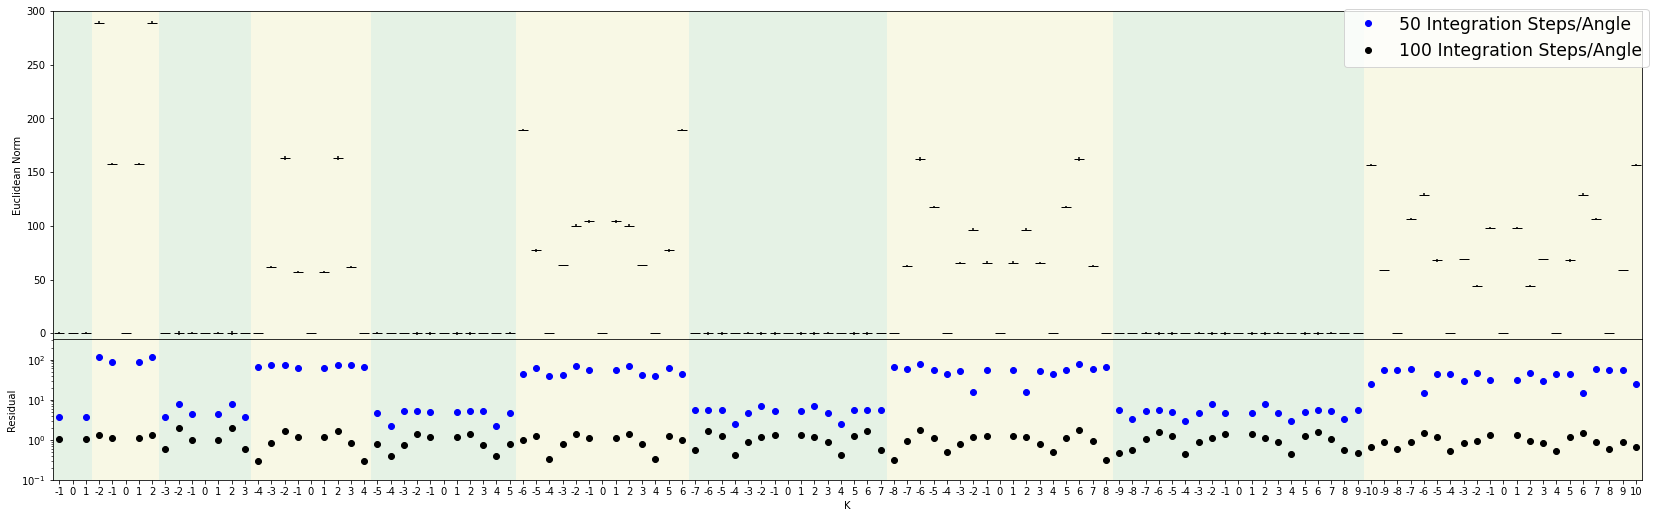

In [96]:
fig = plt.figure(figsize=(23, 7))
ax = []
ax.append(fig.add_axes((0.03, 0.35, 0.96, 0.65)))
ax.append(fig.add_axes((0.03, 0.07, 0.96, 0.28)))
max_norm = 0

for ism, sm in enumerate(sims):
    labels = []
    norm = []
    err = []
    for lmk in mol_mod_raw_num[sm].keys():
        prev_norm_size = len(norm)
        if lmk[0] == 0:
            continue
        labels.append(str(lmk[-1]))
        norm.append(compare[sm][lmk][3])
        err.append(compare[sm][lmk][1])
    if ism == len(sims) - 1:
        ax[0].errorbar(np.arange(len(norm)), norm, yerr=err,
              fmt='_', markersize=10, color='k', ecolor='k')
    ax[1].plot(np.arange(len(norm)), err, 'o', color=colors[ism], label=leg_labels[ism])
    max_norm = np.amax(norm+[max_norm])
    


yL0, yH0 = -5, 300
yL1, yH1 = 1e-1, max_norm*1.15
ax[0].set_xlim(-0.5, len(norm)-0.5)
ax[1].set_xlim(-0.5, len(norm)-0.5)
ax[1].set_xlabel("K")
ax[0].set_ylim(yL0, yH0)
ax[1].set_ylim(yL1, yH1)
ax[0].set_ylabel("Euclidean Norm")
ax[1].set_ylabel("Residual")
ax[1].set_yscale('log')

ax[1].set_xticks(np.arange(len(norm)))
ax[1].set_xticklabels(labels)#, rotation='vertical')


start = 0
for l in np.arange(L_max+1):
    if l == 0:
        continue
    
    if l%2 == 0:
        clr = 'y'
    else:
        clr = 'g'
    rect = plt.Rectangle((start-0.5, yL0), 2*l+1, yH0-yL0, facecolor=clr, alpha=0.1)
    ax[0].add_patch(rect)
    rect = plt.Rectangle((start-0.5, yL1), 2*l+1, yH1-yL1, facecolor=clr, alpha=0.1)
    ax[1].add_patch(rect)
    start += 2*l + 1

fig.legend(loc='upper right', fontsize='xx-large')
fig.savefig("plots/norm_res_imag.png")

In [30]:
for l in range(L_max+1):
    outp = ""
    for m in range(-1*(L_max+1), L_max+1):
        if np.abs(m) > l:
            outp += " &"
        else:
            outp += " "+str(np.round(100*compare[sims[-1]][(l,0,m)][2])/100)+" +/- "+str(np.round(100*compare[sims[-1]][(l,0,m)][0])/100)+" &"
    print(outp)

 & & & & & & & & & & & 650.3 +/- 148.28 & & & & & & & & & & &
 & & & & & & & & & & 0.0 +/- 1.0 & 0.0 +/- 3.29 & 0.0 +/- 1.0 & & & & & & & & & &
 & & & & & & & & & 0.0 +/- 0.23 & 157.38 +/- 1.05 & 202.85 +/- 1.83 & 157.38 +/- 1.05 & 0.0 +/- 0.23 & & & & & & & & &
 & & & & & & & & 0.0 +/- 0.62 & 0.0 +/- 0.24 & 0.0 +/- 0.92 & 0.0 +/- 2.12 & 0.0 +/- 0.92 & 0.0 +/- 0.24 & 0.0 +/- 0.62 & & & & & & & &
 & & & & & & & 217.07 +/- 1.05 & 61.41 +/- 0.87 & 0.0 +/- 0.18 & 56.97 +/- 1.12 & 204.75 +/- 2.02 & 56.97 +/- 1.12 & 0.0 +/- 0.18 & 61.41 +/- 0.87 & 217.07 +/- 1.05 & & & & & & &
 & & & & & & 0.0 +/- 0.7 & 0.0 +/- 1.68 & 0.0 +/- 0.79 & 0.0 +/- 0.29 & 0.0 +/- 1.13 & 0.0 +/- 1.86 & 0.0 +/- 1.13 & 0.0 +/- 0.29 & 0.0 +/- 0.79 & 0.0 +/- 1.68 & 0.0 +/- 0.7 & & & & & &
 & & & & & 0.0 +/- 0.38 & 77.26 +/- 1.12 & 164.49 +/- 1.6 & 63.23 +/- 0.83 & 0.0 +/- 0.27 & 104.22 +/- 1.07 & 97.5 +/- 2.01 & 104.22 +/- 1.07 & 0.0 +/- 0.27 & 63.23 +/- 0.83 & 164.49 +/- 1.6 & 77.26 +/- 1.12 & 0.0 +/- 0.38 & & & & &
 & 

In [42]:
L = 6
for m in range(-1*L, L+1):
    outp = str(m) + " "
    for l in range(L+1):
        if np.abs(m) > l:
            outp += "& "
        else:
            outp += "& $"+str(np.round(100*compare[sims[-1]][(l,0,m)][2])/100)+" \pm "+str(np.round(100*compare[sims[-1]][(l,0,m)][0])/100)+"$ "
    print(outp + "\\\\")

-6 & & & & & & & $0.0 \pm 0.38$ \\
-5 & & & & & & $0.0 \pm 0.7$ & $77.26 \pm 1.12$ \\
-4 & & & & & $217.07 \pm 1.05$ & $0.0 \pm 1.68$ & $164.49 \pm 1.6$ \\
-3 & & & & $0.0 \pm 0.62$ & $61.41 \pm 0.87$ & $0.0 \pm 0.79$ & $63.23 \pm 0.83$ \\
-2 & & & $0.0 \pm 0.23$ & $0.0 \pm 0.24$ & $0.0 \pm 0.18$ & $0.0 \pm 0.29$ & $0.0 \pm 0.27$ \\
-1 & & $0.0 \pm 1.0$ & $157.38 \pm 1.05$ & $0.0 \pm 0.92$ & $56.97 \pm 1.12$ & $0.0 \pm 1.13$ & $104.22 \pm 1.07$ \\
0 & $650.3 \pm 148.28$ & $0.0 \pm 3.29$ & $202.85 \pm 1.83$ & $0.0 \pm 2.12$ & $204.75 \pm 2.02$ & $0.0 \pm 1.86$ & $97.5 \pm 2.01$ \\
1 & & $0.0 \pm 1.0$ & $157.38 \pm 1.05$ & $0.0 \pm 0.92$ & $56.97 \pm 1.12$ & $0.0 \pm 1.13$ & $104.22 \pm 1.07$ \\
2 & & & $0.0 \pm 0.23$ & $0.0 \pm 0.24$ & $0.0 \pm 0.18$ & $0.0 \pm 0.29$ & $0.0 \pm 0.27$ \\
3 & & & & $0.0 \pm 0.62$ & $61.41 \pm 0.87$ & $0.0 \pm 0.79$ & $63.23 \pm 0.83$ \\
4 & & & & & $217.07 \pm 1.05$ & $0.0 \pm 1.68$ & $164.49 \pm 1.6$ \\
5 & & & & & & $0.0 \pm 0.7$ & $77.26 \pm 1.12$ \\
6

In [43]:
L = 6
for m in range(-1*L, L+1):
    outp = str(m) + " "
    for l in range(L+1):
        if np.abs(m) > l:
            outp += "& "
        else:
            outp += "& $"+str(np.round(100*compare[sims[-1]][(l,0,m)][3])/100)+" \pm "+str(np.round(100*compare[sims[-1]][(l,0,m)][1])/100)+"$ "
    print(outp + "\\\\")

-6 & & & & & & & $189.64 \pm 1.0$ \\
-5 & & & & & & $0.0 \pm 0.76$ & $77.26 \pm 1.24$ \\
-4 & & & & & $0.0 \pm 0.3$ & $0.0 \pm 0.4$ & $0.0 \pm 0.33$ \\
-3 & & & & $0.0 \pm 0.6$ & $61.41 \pm 0.82$ & $0.0 \pm 0.73$ & $63.23 \pm 0.77$ \\
-2 & & & $289.29 \pm 1.3$ & $0.0 \pm 1.99$ & $163.11 \pm 1.62$ & $0.0 \pm 1.41$ & $100.05 \pm 1.37$ \\
-1 & & $0.0 \pm 1.03$ & $157.38 \pm 1.1$ & $0.0 \pm 0.98$ & $56.97 \pm 1.17$ & $0.0 \pm 1.18$ & $104.22 \pm 1.12$ \\
0 & $0.0 \pm 0.0$ & $0.0 \pm 0.0$ & $0.0 \pm 0.0$ & $0.0 \pm 0.0$ & $0.0 \pm 0.0$ & $0.0 \pm 0.0$ & $0.0 \pm 0.0$ \\
1 & & $0.0 \pm 1.03$ & $157.38 \pm 1.1$ & $0.0 \pm 0.98$ & $56.97 \pm 1.17$ & $0.0 \pm 1.18$ & $104.22 \pm 1.12$ \\
2 & & & $289.29 \pm 1.3$ & $0.0 \pm 1.99$ & $163.11 \pm 1.62$ & $0.0 \pm 1.41$ & $100.05 \pm 1.37$ \\
3 & & & & $0.0 \pm 0.6$ & $61.41 \pm 0.82$ & $0.0 \pm 0.73$ & $63.23 \pm 0.77$ \\
4 & & & & & $0.0 \pm 0.3$ & $0.0 \pm 0.4$ & $0.0 \pm 0.33$ \\
5 & & & & & & $0.0 \pm 0.76$ & $77.26 \pm 1.24$ \\
6 & & & & & & &

In [63]:
cnt = 0
for l in np.arange(11):
    cnt += 1+l
print(cnt)

66
